In [153]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
%matplotlib inline

## Section 3.1

In [2]:
def make_plot(title='', x_label='', y_label='', z_label='', x_lim=(0, 0), y_lim=(0,0), z_lim=(0,0), 
              grid=True, size=(9, 6), dpi=115, three_d=False):
    '''
    Generates a plot object
    
    Parameters:
        title - (string) title of the plot
        x - (float) a list of values for omega/omega_0
        y - (float) a list of values for the amplitude
        xlim - (float) the limit for the x axis, this is a list containing 2 variables, 
                    the max and min value of x
        ylim - (float) the limit for the y axis, this is a list containing 2 variables, 
                    the max and min value of y
        size - (int) resizing the figure of the plot
        dpi - (int) increasing the quality of the image produced
    Returns:
        plot - (object) the plot
    '''
    fig = plt.figure(figsize=(size[0], size[1]), dpi=dpi)
    plot = fig.add_subplot(111) if not three_d else fig.add_subplot(111, projection='3d')
    
    plot.set_title(title)
    if y_lim[0] != 0 and y_lim[1] !=0: plot.set_ylim(y_lim[0], y_lim[1])
    if x_lim[0] != 0 and x_lim[1] !=0: plot.set_xlim(x_lim[0], x_lim[1])
    if z_lim[0] != 0 and z_lim[1] !=0: plot.set_zlim(z_lim[0], z_lim[1])
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    if three_d: plot.set_zlabel(z_label)
    if grid: plt.grid()
    
    return plot

In [3]:
def auto_correlation(x):
    '''
    Finds the auto correlation of a digital signal
    
    https://dsp.stackexchange.com/questions/31894/where-does-the-delta-function-come-from-if-we-derive-autocorrelation-directly
    http://nptel.ac.in/courses/Webcourse-contents/IIT-%20Guwahati/probability_rp/module_04_random_processes/NPT38_WN.doc
    '''
    return [np.mean(x*np.roll(x, k)) for k in range(len(x))]

def PSD(signal=None, AC=None):
    '''
    Power spectral density function (PSD) 
    
    Fourier transform of the auto-correlation function.
    
    '''
    if (AC is None) & (signal is None):
        print("PEBCAK Error: Must input at least one of signal or AC.")
        return []
    elif AC is None:
        AC = auto_correlation(x)
    
    return np.fft.fft(AC)

In [20]:
def uniform_white_noise(mean, interval, npoints=8192):
    '''
    Function to generate uniformly distributed white noise
    '''
    return mean + np.random.uniform(-interval/2, interval/2, npoints)

def gaussian_white_noise(mean, sigma, npoints=8192):
    '''
    Function to generate gaussian white noise
    '''
    return np.random.normal(mean, sigma, npoints)

def delta(k, npoints=8192):
    signal = np.zeros(npoints)
    signal[k] += 1
    return signal

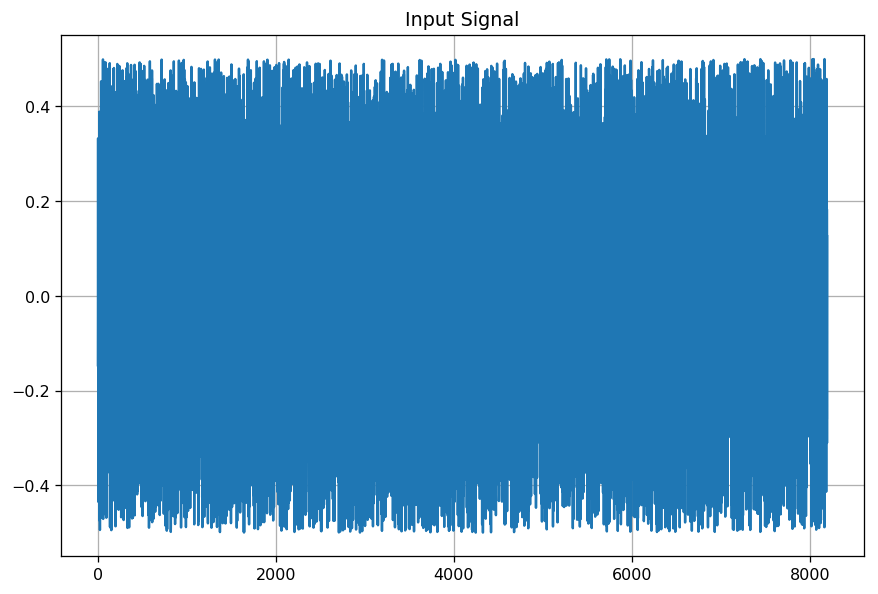

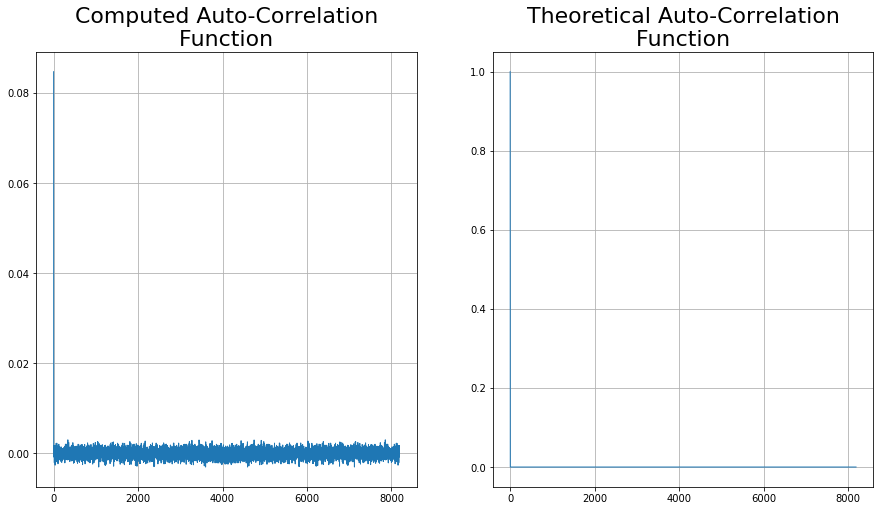

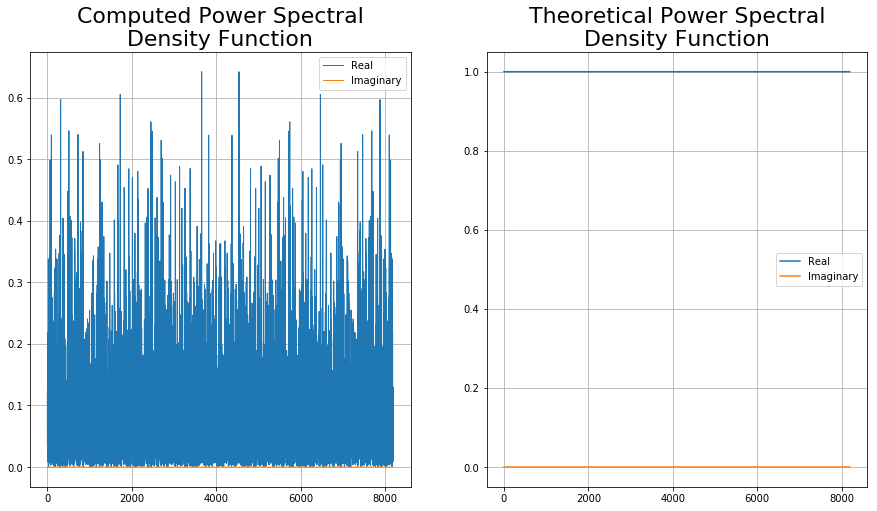

In [21]:
uniform_signal = uniform_white_noise(0, 1)
AC_u = auto_correlation(uniform_signal)
S_u = PSD(AC=AC_u)
S_u_theo = PSD(AC=delta(0))

#****************Plotting****************
font_size=22

make_plot('Input Signal').plot(uniform_signal)

# Auto-correlation function
f,ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(AC_u, linewidth=1)
ax[0].set_title('Computed Auto-Correlation\nFunction', fontsize=font_size)
ax[0].grid('on')
ax[1].plot(delta(0), linewidth=1)
ax[1].set_title('Theoretical Auto-Correlation\nFunction', fontsize=font_size)
ax[1].grid('on')

# PSD
f,ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(S_u.real, label="Real", linewidth=1)
ax[0].plot(S_u.imag, label="Imaginary", linewidth=1)
ax[0].set_title('Computed Power Spectral\nDensity Function', fontsize=font_size)
ax[0].grid('on')
ax[0].legend()
ax[1].plot(S_u_theo.real, label="Real")
ax[1].plot(S_u_theo.imag, label="Imaginary")
ax[1].set_title('Theoretical Power Spectral\nDensity Function', fontsize=font_size)
ax[1].grid('on')
ax[1].legend();

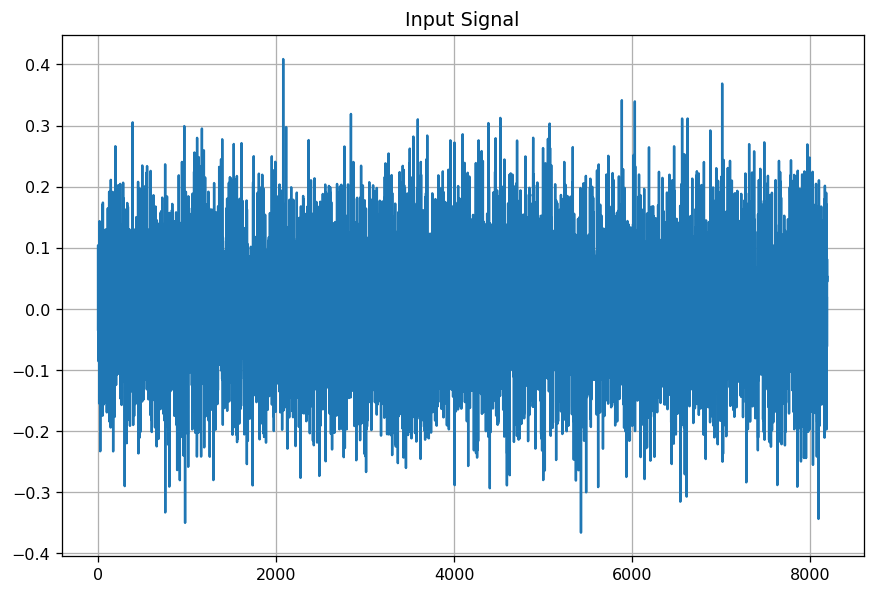

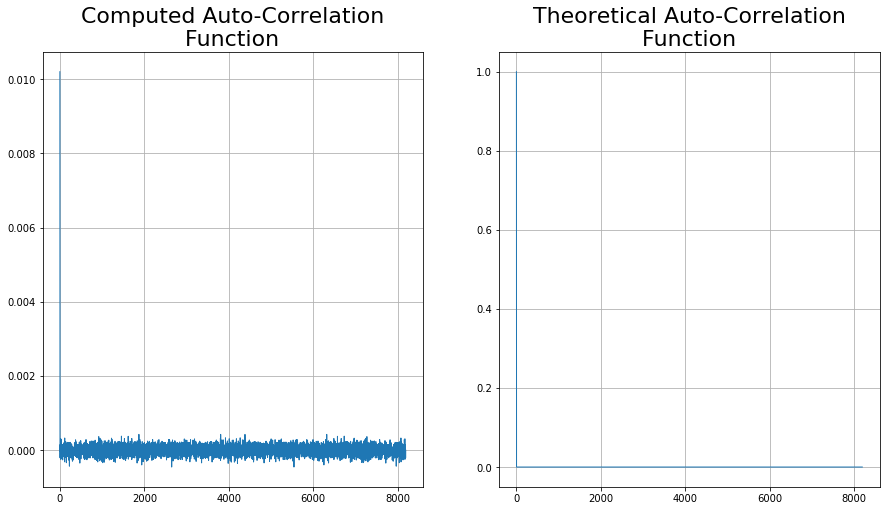

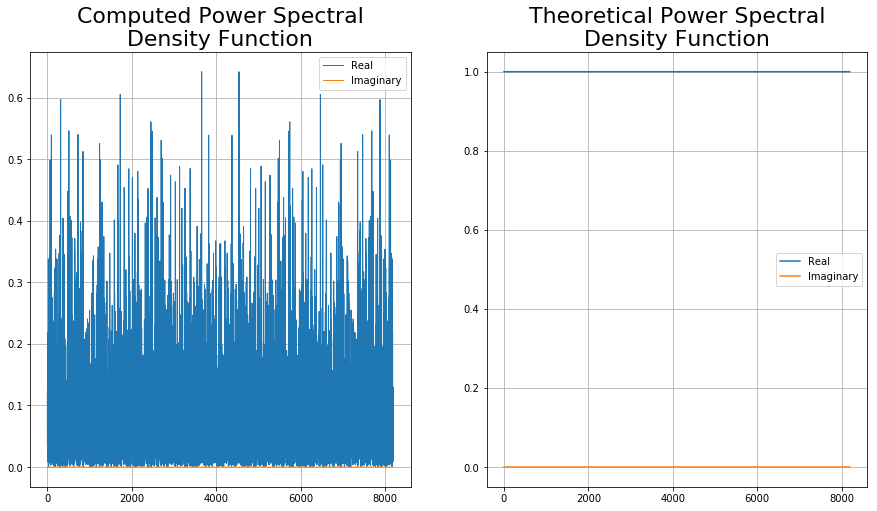

In [22]:
gaussian_signal = gaussian_white_noise(0, 0.1)
AC_g = auto_correlation(gaussian_signal)
S_g = PSD(AC=AC_u)
S_g_theo = PSD(AC=delta(0))

#****************Plotting****************
font_size=22

make_plot('Input Signal').plot(gaussian_signal)

# Auto-correlation function
f,ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(AC_g, linewidth=1)
ax[0].set_title('Computed Auto-Correlation\nFunction', fontsize=font_size)
ax[0].grid('on')
ax[1].plot(delta(0), linewidth=1)
ax[1].set_title('Theoretical Auto-Correlation\nFunction', fontsize=font_size)
ax[1].grid('on')

# PSD
f,ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(S_g.real, label="Real", linewidth=1)
ax[0].plot(S_g.imag, label="Imaginary", linewidth=1)
ax[0].set_title('Computed Power Spectral\nDensity Function', fontsize=font_size)
ax[0].grid('on')
ax[0].legend()
ax[1].plot(S_g_theo.real, label="Real")
ax[1].plot(S_g_theo.imag, label="Imaginary")
ax[1].set_title('Theoretical Power Spectral\nDensity Function', fontsize=font_size)
ax[1].grid('on')
ax[1].legend();

# Section 4.1

In [145]:
def rk4(x_prime, y_prime, z_prime):
    '''
    Implements a fourth order Runge-Kutta method of integration
    for three equations, all without a time dependence.
    
    https://rosettacode.org/wiki/Runge-Kutta_method#using_lambda
    https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods 
    https://math.stackexchange.com/questions/721076/help-with-using-the-runge-kutta-4th-order-method-on-a-system-of-2-first-order-od
    https://www.codeproject.com/Tips/792927/Fourth-Order-Runge-Kutta-Method-in-Python
    https://www.youtube.com/watch?v=EXvLju3DLMY
    '''
    return lambda x, y, z, h: (
            lambda k0, l0, j0: (
                lambda k1, l1, j1: (
                    lambda k2, l2, j2: (
                        lambda k3, l3, j3: (x + h*(k0 + 2*(k1 + k2) + k3)/6, 
                                            y + h*(l0 + 2*(l1 + l2) + l3)/6,
                                            z + h*(j0 + 2*(j1 + j2) + j3)/6)
                        )(x_prime(x+h*k2, y+h*l2, z+h*j2),
                          y_prime(x+h*k2, y+h*l2, z+h*j2),
                          z_prime(x+h*k2, y+h*l2, z+h*j2))
                    )(x_prime(x+h*k1/2, y+h*l1/2, z+h*j1/2),
                      y_prime(x+h*k1/2, y+h*l1/2, z+h*j1/2),
                      z_prime(x+h*k1/2, y+h*l1/2, z+h*j1/2))
                )(x_prime(x+h*k0/2, y+h*l0/2, z+h*j0/2),
                  y_prime(x+h*k0/2, y+h*l0/2, z+h*j0/2),
                  z_prime(x+h*k0/2, y+h*l0/2, z+h*j0/2))
            )(x_prime(x, y, z),
              y_prime(x, y, z),
              z_prime(x, y, z))

def funtion_derivatives(r, sigma=10, b=8/3):
    return (lambda x, y, z: sigma*(y - x),
            lambda x, y, z: r*x - y - x*z,
            lambda x, y, z: x*y - b*z    )

def lorenz_positions(max_time=40, x_0=5, y_0=5, z_0=5, dt=0.01):
    x, y, z = [x_0], [y_0], [z_0]

    for time in np.arange(0, max_time, dt):
        x_temp, y_temp, z_temp = new_fn(x[-1], y[-1], z[-1], dt)

        x.append(x_temp)
        y.append(y_temp)
        z.append(z_temp)
    
    return x, y, z

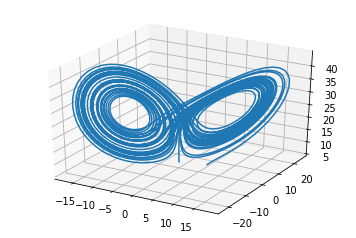

In [146]:
new_fn = rk4(*funtion_derivatives(28))

x, y, z = lorenz_positions()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x, y, z);

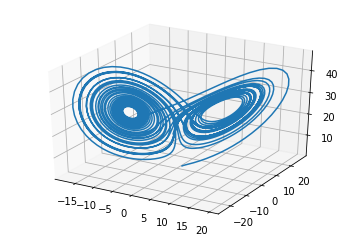

In [103]:
'''
THEORETICAL FROM WIKIPEDIA. DO NOT USE.

Maybe do a comparison though?
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
  x, y, z = state  # unpack the state vector
  return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(states[:,0], states[:,1], states[:,2])
plt.show()

<IPython.core.display.Javascript object>


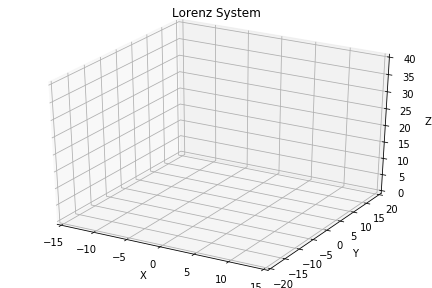

In [156]:
%matplotlib notebook
%matplotlib notebook

def update_lines(num, dataLines, lines):
    #Source: https://matplotlib.org/examples/animation/simple_3danim.html
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

def generate_plot_object():
    #Source: https://matplotlib.org/examples/animation/simple_3danim.html
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # NOTE: Can't pass empty arrays into 3d version of plot()
    lines = [ax.plot(dat[0:1], dat[0:1], dat[0:1])[0] for dat in data]

    # Setting the axes properties
    ax.set_xlim3d([-15, 15])
    ax.set_xlabel('X')

    ax.set_ylim3d([-20, 20])
    ax.set_ylabel('Y')

    ax.set_zlim3d([0.0, 40])
    ax.set_zlabel('Z')

    ax.set_title('Lorenz System')
    return fig, lines

nframes = 100
data = lorenz_positions(dt=40/nframes)

fig, lines = generate_plot_object()

line_ani = animation.FuncAnimation(fig, update_lines, nframes, fargs=(data, lines),
                                   interval=100, blit=True);

# Uncomment these lines to save the animation. 
# Please make sure that you download ffmpeg and then set the pointer to the correct location for your system
#plt.rcParams['animation.ffmpeg_path'] = '/home/nathan.meulenbroek/miniconda3/bin'
#line_ani.save('particle_box.mp4', fps=30, extra_args=['-vcodec', 'libx264'])